<a href="https://colab.research.google.com/github/Think-JIn99/All-about-Market/blob/main/%EA%B8%B0%EC%88%A0%ED%88%AC%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import seaborn as sns  
import numpy as np
import sklearn
import sklearn.preprocessing
import tensorflow as tf
import requests
import matplotlib.pyplot as plt
%matplotlib inline 


In [5]:
#해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
#다운로드와 동시에 Pandas에 excel 파일이 load가 되는 구조입니다.
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#stock_code.head()

# 데이터에서 정렬이 따로 필요하지는 않지만 테스트겸 Pandas sort_values를 이용하여 정렬을 시도해봅니다.
stock_code.sort_values(['상장일'], ascending=True)

# 필요한 것은 "회사명"과 "종목코드" 이므로 필요없는 column들은 제외
stock_code = stock_code[['회사명', '종목코드']] 

# 한글 컬럼명을 영어로 변경 
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
#stock_code.head() 

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
stock_code.code = stock_code.code.map('{:06d}'.format) 

In [6]:
company='삼성전자'
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
a = 0
df = pd.DataFrame()
for page in range(1,51):
    a += 1
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    if a%10 == 0:
      print(url)
    header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  
    res = requests.get(url,headers=header)
    df = df.append(pd.read_html(res.text, header=0)[0])

http://finance.naver.com/item/sise_day.nhn?code=005930&page=10
http://finance.naver.com/item/sise_day.nhn?code=005930&page=20
http://finance.naver.com/item/sise_day.nhn?code=005930&page=30
http://finance.naver.com/item/sise_day.nhn?code=005930&page=40
http://finance.naver.com/item/sise_day.nhn?code=005930&page=50


In [7]:
df_raw = df.copy()

In [8]:
df = df_raw.copy()

In [9]:
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', 
                         '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 

# 상위 5개 데이터 확인 
df[:5]


,date,close,diff,open,high,low,volume
13,2020-02-18,59800,1700,60800,60900,59700,16674266
12,2020-02-19,60200,400,59800,60400,59400,12951496
11,2020-02-20,60000,200,60700,61300,59600,14591924
10,2020-02-21,59200,800,58800,59800,58500,13777393
9,2020-02-24,56800,2400,57400,58100,56800,25627537


Text(0.5, 1.0, 'SAMSUNG STOCK')

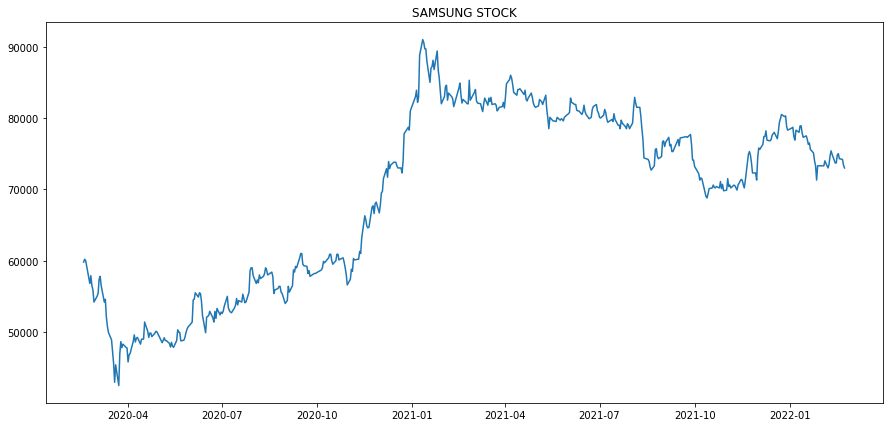

In [10]:
plt.figure(figsize=(15,7))
plt.plot(df['date'], df['close'])
plt.title("SAMSUNG STOCK")


In [11]:
df['RP'] = round((df['close'] + df['high'] + df['low']) / 3, 0)
df

,date,close,diff,open,high,low,volume,RP
13,2020-02-18,59800,1700,60800,60900,59700,16674266,60133.0
12,2020-02-19,60200,400,59800,60400,59400,12951496,60000.0
11,2020-02-20,60000,200,60700,61300,59600,14591924,60300.0
10,2020-02-21,59200,800,58800,59800,58500,13777393,59167.0
9,2020-02-24,56800,2400,57400,58100,56800,25627537,57233.0
...,...,...,...,...,...,...,...,...
5,2022-02-17,75000,200,75000,75600,74500,13605382,75033.0
4,2022-02-18,74300,700,74600,74800,73700,10122226,74267.0
3,2022-02-21,74200,100,73200,74300,72600,10489717,73700.0
2,2022-02-22,73400,800,73000,73400,72800,11692469,73200.0


In [12]:
df['RP * volume'] = df['RP'] * df['volume']
df.reset_index(drop=True, inplace=True)
df

,date,close,diff,open,high,low,volume,RP,RP * volume
0,2020-02-18,59800,1700,60800,60900,59700,16674266,60133.0,1.002674e+12
1,2020-02-19,60200,400,59800,60400,59400,12951496,60000.0,7.770898e+11
2,2020-02-20,60000,200,60700,61300,59600,14591924,60300.0,8.798930e+11
3,2020-02-21,59200,800,58800,59800,58500,13777393,59167.0,8.151670e+11
4,2020-02-24,56800,2400,57400,58100,56800,25627537,57233.0,1.466741e+12
...,...,...,...,...,...,...,...,...,...
495,2022-02-17,75000,200,75000,75600,74500,13605382,75033.0,1.020853e+12
496,2022-02-18,74300,700,74600,74800,73700,10122226,74267.0,7.517474e+11
497,2022-02-21,74200,100,73200,74300,72600,10489717,73700.0,7.730921e+11
498,2022-02-22,73400,800,73000,73400,72800,11692469,73200.0,8.558887e+11


In [13]:
df['VWAP'] = 0
df

,date,close,diff,open,high,low,volume,RP,RP * volume,VWAP
0,2020-02-18,59800,1700,60800,60900,59700,16674266,60133.0,1.002674e+12,0
1,2020-02-19,60200,400,59800,60400,59400,12951496,60000.0,7.770898e+11,0
2,2020-02-20,60000,200,60700,61300,59600,14591924,60300.0,8.798930e+11,0
3,2020-02-21,59200,800,58800,59800,58500,13777393,59167.0,8.151670e+11,0
4,2020-02-24,56800,2400,57400,58100,56800,25627537,57233.0,1.466741e+12,0
...,...,...,...,...,...,...,...,...,...,...
495,2022-02-17,75000,200,75000,75600,74500,13605382,75033.0,1.020853e+12,0
496,2022-02-18,74300,700,74600,74800,73700,10122226,74267.0,7.517474e+11,0
497,2022-02-21,74200,100,73200,74300,72600,10489717,73700.0,7.730921e+11,0
498,2022-02-22,73400,800,73000,73400,72800,11692469,73200.0,8.558887e+11,0


In [14]:
# 2일 평균으로 해보자
for i in range(2, 500):
  df.iloc[i, 9] = sum(df.iloc[i-2:i, 7]* df.iloc[i-2:i, 6]) / sum(df.iloc[i-2:i, 6])

In [15]:
df

,date,close,diff,open,high,low,volume,RP,RP * volume,VWAP
0,2020-02-18,59800,1700,60800,60900,59700,16674266,60133.0,1.002674e+12,0.000000
1,2020-02-19,60200,400,59800,60400,59400,12951496,60000.0,7.770898e+11,0.000000
2,2020-02-20,60000,200,60700,61300,59600,14591924,60300.0,8.798930e+11,60074.856383
3,2020-02-21,59200,800,58800,59800,58500,13777393,59167.0,8.151670e+11,60158.933684
4,2020-02-24,56800,2400,57400,58100,56800,25627537,57233.0,1.466741e+12,59749.765172
...,...,...,...,...,...,...,...,...,...,...
495,2022-02-17,75000,200,75000,75600,74500,13605382,75033.0,1.020853e+12,74184.792902
496,2022-02-18,74300,700,74600,74800,73700,10122226,74267.0,7.517474e+11,74856.288254
497,2022-02-21,74200,100,73200,74300,72600,10489717,73700.0,7.730921e+11,74706.223482
498,2022-02-22,73400,800,73000,73400,72800,11692469,73200.0,8.558887e+11,73978.445469


Text(0.5, 1.0, 'SAMSUNG STOCK')

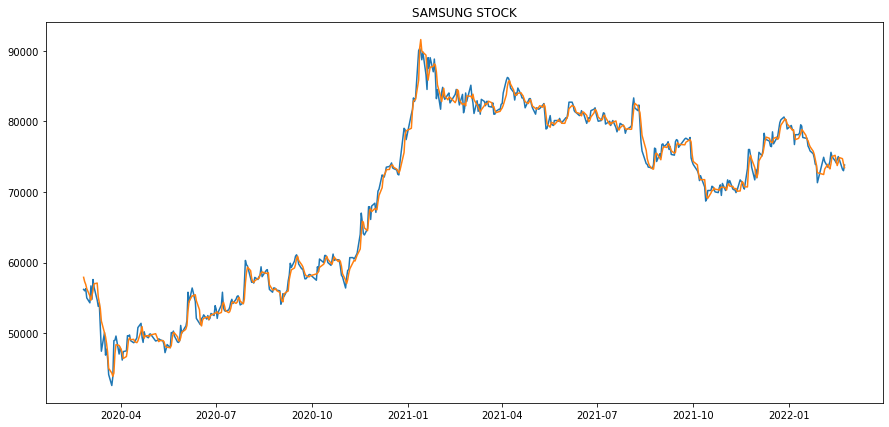

In [16]:
df = df[5:]
plt.figure(figsize=(15,7))
plt.plot(df['date'], df['open'])
plt.plot(df['date'], df['VWAP'])

plt.title("SAMSUNG STOCK")

In [17]:
df['money'] = 0
DF = df[['open', 'VWAP', 'money']]
DF['stock'] = 0
DF['updown'] = 0
DF.loc[0:5, 'money'] = 100000000
DF[0:10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,open,VWAP,money,stock,updown
5,56200,57909.196559,100000000,0,0
6,56000,57297.642583,0,0,0
7,56300,56919.470807,0,0,0
8,55000,56309.338417,0,0,0
9,54300,55272.241231,0,0,0
10,56700,54666.693486,0,0,0
11,54800,55249.337858,0,0,0
12,57600,56129.484374,0,0,0
13,56500,56984.588307,0,0,0
14,54700,57098.488646,0,0,0


In [27]:
for i in range(5, 500):
  if DF.loc[i, 'open'] > DF.loc[i, 'VWAP']:
    DF.loc[i, 'updown'] = 1
  if DF.loc[i, 'open'] < DF.loc[i, 'VWAP']: 
    DF.loc[i, 'updown'] = 0
  
DF[:40]

,open,VWAP,money,stock,updown
5,56200,57909.196559,100000000,0,0
6,56000,57297.642583,0,0,0
7,56300,56919.470807,0,0,0
8,55000,56309.338417,0,0,0
9,54300,55272.241231,0,0,0
10,56700,54666.693486,0,0,1
11,54800,55249.337858,0,0,0
12,57600,56129.484374,0,0,1
13,56500,56984.588307,0,0,0
14,54700,57098.488646,0,0,0


# 잘못된 방법으로 했나?
거래량 가중 평균가는 후행성 지표이며, 이는 가격을 예측하는 특성이 없음을 의미합니다. 일부 트레이더는 하루 동안의 분석에 거래량 가중 평균가를 사용할 때 가장 유용하다고 주장합니다. 다른 시장 분석 도구와 마찬가지로, 거래량 가중 평균가는 단독으로 해석되어서는 안 되며, 다른 기술과 조합해 사용할 때 효과가 가장 좋습니다.

# 전일비로 해보자!

In [19]:
df = df_raw.copy()
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', 
                         '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 

df.reset_index(drop=True, inplace=True)

# 상위 5개 데이터 확인 
df[:5]

,date,close,diff,open,high,low,volume
0,2020-02-18,59800,1700,60800,60900,59700,16674266
1,2020-02-19,60200,400,59800,60400,59400,12951496
2,2020-02-20,60000,200,60700,61300,59600,14591924
3,2020-02-21,59200,800,58800,59800,58500,13777393
4,2020-02-24,56800,2400,57400,58100,56800,25627537


In [20]:
df['range'] = df['high'] - df['low']
df[:5]

,date,close,diff,open,high,low,volume,range
0,2020-02-18,59800,1700,60800,60900,59700,16674266,1200
1,2020-02-19,60200,400,59800,60400,59400,12951496,1000
2,2020-02-20,60000,200,60700,61300,59600,14591924,1700
3,2020-02-21,59200,800,58800,59800,58500,13777393,1300
4,2020-02-24,56800,2400,57400,58100,56800,25627537,1300


In [21]:
temp = ((df['high'].iloc[:-1].values - df['low'].iloc[:-1].values) * 0.5 + df['open'].iloc[1:].values)
temp = np.insert(temp, 0, np.nan)
df['target'] = temp

In [22]:
df['Percent'] = np.where(df['high'] > df['target'], df['close'] / df['target'], 1)
df

,date,close,diff,open,high,low,volume,range,target,Percent
0,2020-02-18,59800,1700,60800,60900,59700,16674266,1200,NaN,1.000000
1,2020-02-19,60200,400,59800,60400,59400,12951496,1000,60400.0,1.000000
2,2020-02-20,60000,200,60700,61300,59600,14591924,1700,61200.0,0.980392
3,2020-02-21,59200,800,58800,59800,58500,13777393,1300,59650.0,0.992456
4,2020-02-24,56800,2400,57400,58100,56800,25627537,1300,58050.0,0.978467
...,...,...,...,...,...,...,...,...,...,...
495,2022-02-17,75000,200,75000,75600,74500,13605382,1100,75350.0,0.995355
496,2022-02-18,74300,700,74600,74800,73700,10122226,1100,75150.0,1.000000
497,2022-02-21,74200,100,73200,74300,72600,10489717,1700,73750.0,1.006102
498,2022-02-22,73400,800,73000,73400,72800,11692469,600,73850.0,1.000000


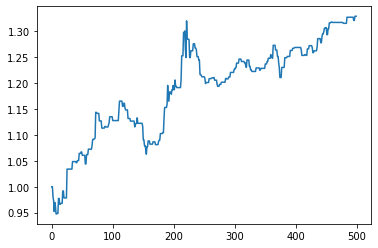

In [23]:
arr = df['Percent'].cumprod()
plt.plot(arr)

In [24]:
df['Drop'] = (1 - df['Percent'] / df['Percent'].cummax()) * 100
seed = 60000
df['Profit'] = df['Percent'].cumprod() * seed

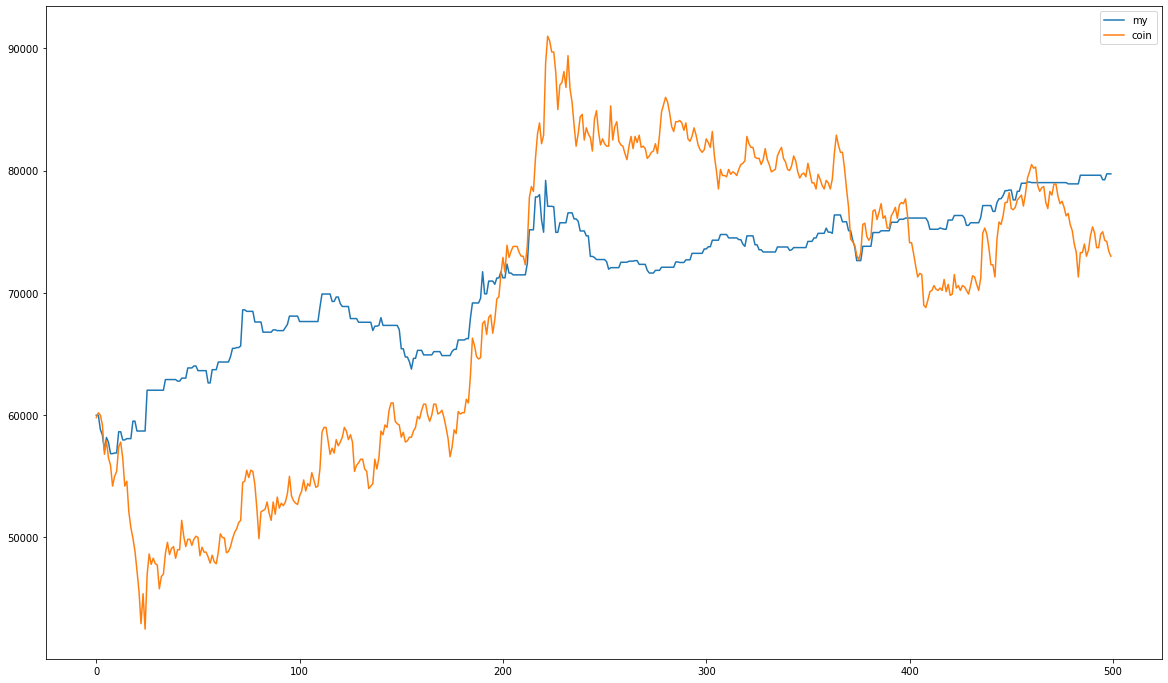

In [25]:
plt.figure(figsize=(20,12))
plt.plot(df['Profit'],label = 'my')
plt.plot(df['close'],label = 'coin')
plt.legend()